# data normalization

The goal of data normalization is to ensure that data is similar across all the events.
Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range. 

Data normalization is used make our analysis less sensitive to the scale of features. 

Put simply, data normalization ensures uniformity in how your data looks, reads, and can be utilized—across all of the records 


#####  What is Feature Scaling?
Feature Scaling is the process of bringing all of the features of a problem to a similar scale or range. The definition is as follows: Feature scaling is a method used to normalize the range of independent variables or features of data.



2. What is Mean Normalization?
Mean Normalization is a way to implement Feature Scaling. What Mean normalization does is that it calculates and subtracts the mean for every feature. A common practice is also to divide this value by the range or the standard deviation.


When the same process is done and the standard deviation is used as the denominator then this process is called Standardization

Generally, Feature Scaling is used when the features do not have the same range of values. 

In [ ]:
# sum of cat: 
#normlize in each event by the sum of that event
#mean
#of each of the 3 most active day vs avg day = contibu

In [1]:
import numpy as np
from numpy import std
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
import plotly.express as px

# import the datetime module
import datetime as dt
from datetime import datetime
from datetime import date
import calendar

#peaks
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

from utiles import *
from IPython.display import Image

In [ ]:
data = pd.read_csv("data_1.csv")
data=data.set_index('Unnamed: 0')
data = data.drop(data[data['Event_first_revision_date'] == "0"].index) # drop empty Event date 73
data['Event_first_revision_date'] = pd.to_datetime(data['Event_first_revision_date'])
data['Category'].value_counts()

In [ ]:
cat='Earthquakes'
df=data[data["Category"]==cat].iloc[:,:-3].T
df.index = pd.to_datetime(df.index)
df = df.loc[:,~df.columns.duplicated()].copy()


In [ ]:
normalized_df=(df-df.mean())/df.std()

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [ ]:
normalized_df_min_max=(df-df.min())/(df.max()-df.min())


In [ ]:
def norm_sum(df):
    dff=pd.concat([df[col] / df[col].sum() for col in df], axis=1, ignore_index=True) #norml by sum of colm prrc
    dff.columns= df.columns
    return dff

def norm(df):
    dff=pd.concat([(df[col] - df[col].mean()) / df[col].std() for col in df], axis=1, ignore_index=True) #norml by sum of colm prrc
    dff.columns= df.columns
    return dff

def col_cumsum(df):
    dff=pd.concat([df[col].cumsum() for col in df], axis=1, ignore_index=True) #norml by sum of colm prrc
    dff.columns= df.columns
    return dff


def sort(df):
    dff=pd.concat([df[col].sort_values(ignore_index=True, ascending=False) for col in df], axis=1, ignore_index=True) #norml by sum of colm prrc
    dff.columns= df.columns
    return dff

Cumulative sums, or running totals, are used to display the total sum of data as it grows with time (or any other series or progression). This lets you view the total contribution so far of a given measure against time.

In [ ]:
df_col_scaled=norm_sum(df)
col_scaled_sorted_cumsum=col_cumsum(sort(df_col_scaled))


normalized_df_min_max_sorted=sort(normalized_df_min_max)
normalized_df_sorted=sort(normalized_df)

scaled_dfmean_sorted_comsum=col_cumsum(sort(df_col_scaled.mean(axis=1).to_frame()))

In [ ]:
scaled=col_scaled_sorted_cumsum.round(5)
a_series = pd. Series([len(scaled[scaled[col]>=1.0]) for col in scaled.columns ], index = scaled. columns)
df_1=a_series.to_frame().sort_values(by=0,ascending=False)


In [ ]:
mean_df= pd.DataFrame()
mean_df['Round05']=scaled.mean(axis=1).to_frame()[0]
mean_df['Original']=col_scaled_sorted_cumsum.mean(axis=1).to_frame().values

In [ ]:
fig = px.line( mean_df, x=mean_df.index, y=mean_df.columns,log_x=True)# log on y and log x line or  curve
fig.show()

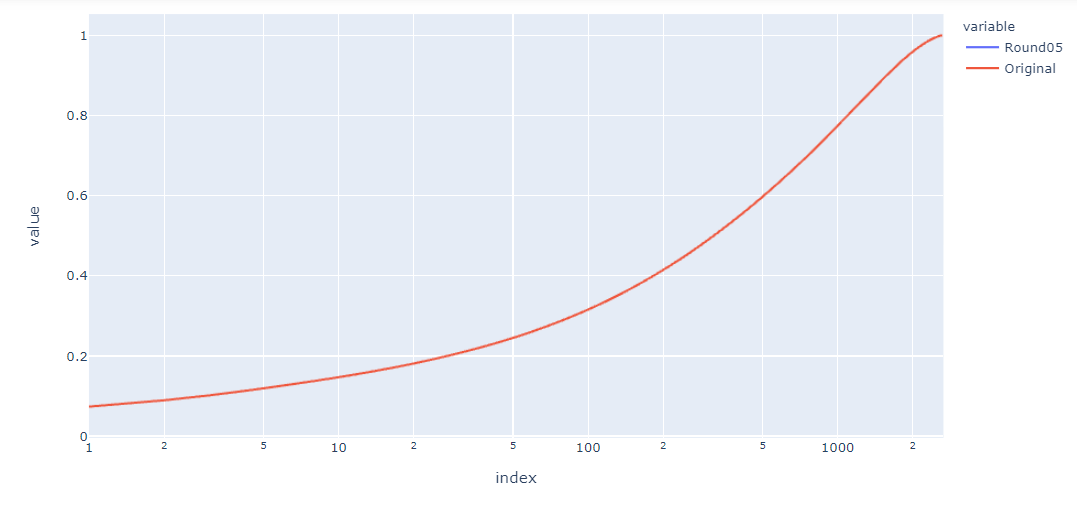

In [4]:
Image("./pic3.png")

A hypothisis we will start fixating from now is the threshold from witch we consider the event is has reached his maximum views.
The threshold is 1 month meaning 30 days
- in 30 days only 11 events with represents (11*900)/100

In [ ]:
fig = px.box(df_1, y=0, points="all")
fig.show()

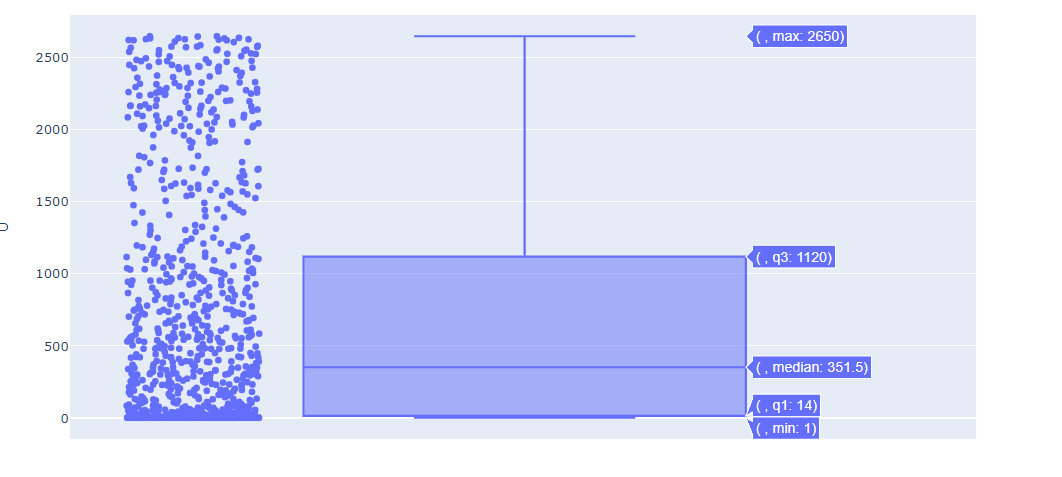

In [3]:
Image("./pic2.png")

In [ ]:
quantile_4=df_1[df_1[0]>1120].index.values
quantile_3= df_1[(df_1[0]<=1120) & (df_1[0]>351)].index.values
quantile_2= df_1[(df_1[0]<=351) & (df_1[0]>14)].index.values
quantile_1= df_1[(df_1[0]<=14) & (df_1[0]>0)].index.values

In [ ]:
quantile_4_mean=scaled[quantile_4].mean(axis=1).to_frame()
quantile_3_mean=scaled[quantile_3].mean(axis=1).to_frame()
quantile_2_mean=scaled[quantile_2].mean(axis=1).to_frame()
quantile_1_mean=scaled[quantile_1].mean(axis=1).to_frame()

In [ ]:
fig = px.line( scaled, x=scaled.index, y=quantile_4,log_x=False , width=800, height=400, title="accumulative sum of the views for the flights in quantile_4 ")# log on y and log x line or  curve
fig.show()
fig = px.line( quantile_4_mean, x=quantile_4_mean.index,y=quantile_4_mean.columns[0],log_x=True , width=800, height=300,title="Mean of accumulative sum of views" )# log on y and log x line or  curve
fig.show()

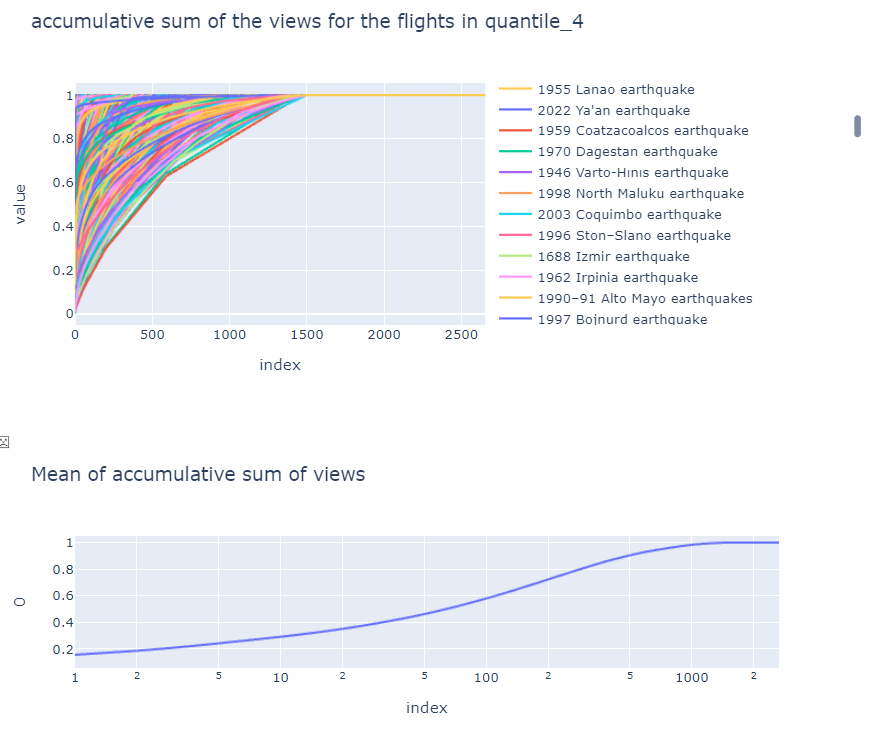

In [2]:

Image("./pic1.png")

In [ ]:
# fig = px.line( scaled, x=scaled.index, y=quantile_3,log_x=False , width=800, height=400, title="accumulative sum of the views for the flights in quantile_3 ")# log on y and log x line or  curve
# fig.show()
# fig = px.line( quantile_3_mean, x=quantile_3_mean.index,y=quantile_3_mean.columns[0],log_x=True , width=800, height=300,title="Mean of accumulative sum of views" )# log on y and log x line or  curve
# fig.show()

In [ ]:
# fig = px.line( scaled, x=scaled.index, y=quantile_2,log_x=False , width=800, height=400, title="accumulative sum of the views for the flights in quantile_2 ")# log on y and log x line or  curve
# fig.show()
# fig = px.line( quantile_2_mean, x=quantile_2_mean.index,y=quantile_2_mean.columns[0],log_x=True , width=800, height=300,title="Mean of accumulative sum of views" )# log on y and log x line or  curve
# fig.show()

In [ ]:
# fig = px.line( scaled, x=scaled.index, y=quantile_1,log_x=False , width=800, height=400, title="accumulative sum of the views for the flights in quantile_1 ")# log on y and log x line or  curve
# fig.show()
# fig = px.line( quantile_1_mean, x=quantile_1_mean.index,y=quantile_1_mean.columns[0],log_x=True , width=800, height=300,title="Mean of accumulative sum of views" )# log on y and log x line or  curve
# fig.show()